In [67]:
import numpy as np
import matplotlib.pyplot as plt
import time

wirkingDir = './'

In [68]:
def matrixFromFile(fileName):
    with open(workingDir + fileName,'r') as file:
        content = file.readlines()
    
    params = content[0].split()
    rows = int(params[0])
    cols = int(params[1])
    n = int(params[2])

    A = np.zeros((rows,cols))

    content.pop(0)
    for elemento in content:
        params = elemento.split()
        i = int(params[0])
        j = int(params[1])
        val = float(params[2])

        A[i,j] = val

    return A

def vectorFromFile(fileName):
    with open(wirkingDir + fileName,'r') as file:
        content = file.readlines()
    n = int(content[0])
    f = []
    for i in range(n):
        f.append(float(content[i+1]))
    return np.array(f)


def formatSol(n,u):
    out = []
    temp = []

    for i in range(n):
        for j in range(n):
            temp.append(u[i*n+j])
        out.append(temp)
        temp = []

    return np.matrix(out)

In [69]:
finestGridN = 20
levels = 4
N = finestGridN
for i in range(1,levels+1):
    N = N * 2 - 1
print(N)

305


In [70]:
alpha = 1.
width = 10.
!./../prova {N} {alpha} {width}
#N = finestGridN

Achieved residual on coarse grid: 0.0747367


Achieved residual on coarse grid: 0.0828087
Achieved residual on coarse grid: 0.090901
Achieved residual on coarse grid: 0.0990682
Achieved residual on coarse grid: 0.0979528
Achieved residual on coarse grid: 0.0992141
Achieved residual on coarse grid: 0.0996555
Achieved residual on coarse grid: 0.0996729
Achieved residual on coarse grid: 0.099674
Achieved residual on coarse grid: 0.0996745
Achieved residual on coarse grid: 0.0996759
Achieved residual on coarse grid: 0.0994238
Achieved residual on coarse grid: 0.0998007
Achieved residual on coarse grid: 0.0999951
Achieved residual on coarse grid: 0.094569
Achieved residual on coarse grid: 0.0948156
Achieved residual on coarse grid: 0.0949055
Achieved residual on coarse grid: 0.0935429
Achieved residual on coarse grid: 0.0972067
Achieved residual on coarse grid: 0.0946663


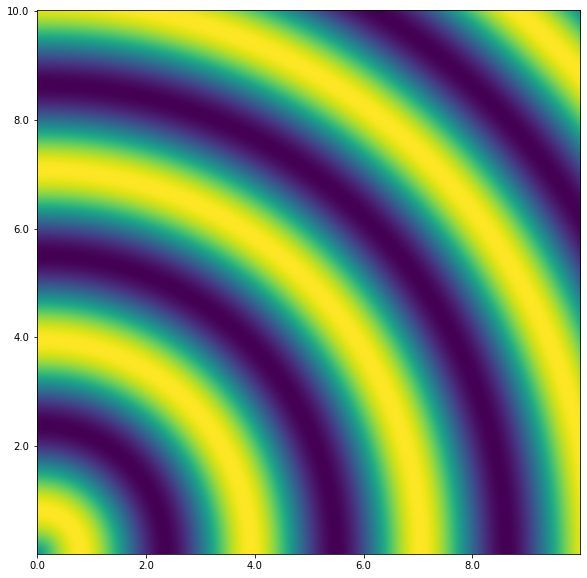

In [71]:
plt.rcParams['figure.figsize'] = [10,10]
colorMap = 'viridis'
u = vectorFromFile('x.mtx')
sol = formatSol(N,u)
plt.imshow(sol,cmap=colorMap)
plt.yticks(np.arange(0,N,N/5),np.around(width - np.arange(0,N,N/5)*width/N, decimals=2))
plt.xticks(np.arange(0,N,N/5),np.around(np.arange(0,N,N/5)*width/N, decimals=2))
plt.show()

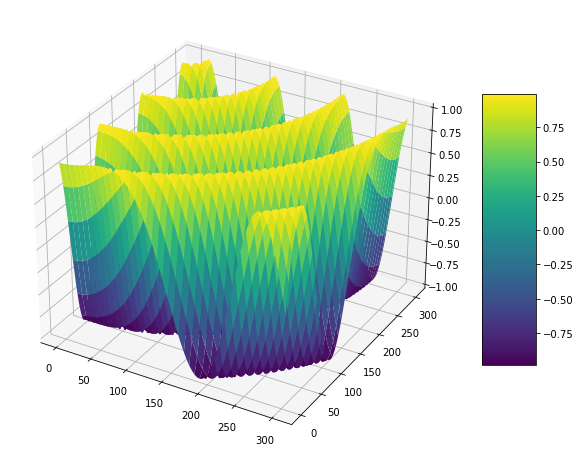

In [72]:
X = np.arange(0,N)
Y = np.arange(0,N)

X,Y = np.meshgrid(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X,Y,sol,cmap = colorMap)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [73]:
'''
matrici = ['A_h.mtx','A_2h.mtx','A_4h.mtx']

for matrice in matrici:
    mat = matrixFromFile(matrice)
    plt.imshow(mat)
    plt.show()
'''

"\nmatrici = ['A_h.mtx','A_2h.mtx','A_4h.mtx']\n\nfor matrice in matrici:\n    mat = matrixFromFile(matrice)\n    plt.imshow(mat)\n    plt.show()\n"

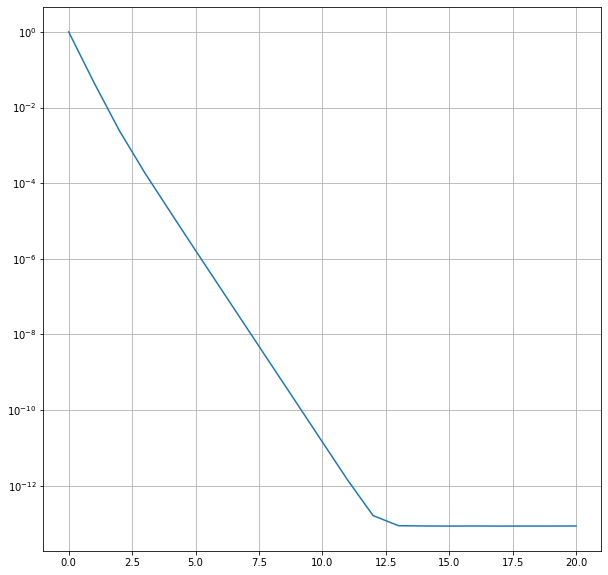

In [74]:

solvers = ['MGGS4.txt']
for solver in solvers:
    error = vectorFromFile(solver)
    x = np.arange(0,len(error))
    plt.semilogy(x,error)
plt.grid()
plt.show()

In [75]:
'''
times = []
xaxis = []
testValues = [2*i for i in range(2,25)]
levels = 4

for n in testValues:
    for i in range(1,levels+1):
        n = n * 2 - 1
    print(f'N = {n}')

    t = time.time()
    
    !./prova {n} {alpha} {width}

    times.append(time.time() - t)
    xaxis.append(n)

'''

"\ntimes = []\nxaxis = []\ntestValues = [2*i for i in range(2,25)]\nlevels = 4\n\nfor n in testValues:\n    for i in range(1,levels+1):\n        n = n * 2 - 1\n    print(f'N = {n}')\n\n    t = time.time()\n    \n    !./prova {n} {alpha} {width}\n\n    times.append(time.time() - t)\n    xaxis.append(n)\n\n"

In [76]:
'''
plt.plot(xaxis,times,'x')
plt.grid()
plt.show()
'''

"\nplt.plot(xaxis,times,'x')\nplt.grid()\nplt.show()\n"

In [77]:
'''
dy = []
x = []

for i in range(len(times)-1):
    dy.append((times[i+1]-times[i])/(xaxis[i+1]-xaxis[i]))
    x.append(0.5 * (xaxis[i+1]+xaxis[i]))

plt.plot(x,dy)
plt.show()
'''

'\ndy = []\nx = []\n\nfor i in range(len(times)-1):\n    dy.append((times[i+1]-times[i])/(xaxis[i+1]-xaxis[i]))\n    x.append(0.5 * (xaxis[i+1]+xaxis[i]))\n\nplt.plot(x,dy)\nplt.show()\n'